<h2>Contents</h2>
<ul style="list-style:none">
    <li><a href="#intro">1 Introduction</a>
        <ul style="list-style:none">
            <li><a href="#intro">1.1 Introduction</a></li>
            <li><a href="#overview">1.2 Overview</a></li>
            <li><a href="#data">1.3 The Data</a></li>
        </ul>
    </li>
    <li><a href="#intro">2 Modelling</a>
        <ul style="list-style:none">
            <li><a href="#general">2.1 The General Model</a></li>
            <li><a href="#metric">2.2 The Econometric Model</a></li>
            <li><a href="#reg">2.3 The Sample Regression Equation</a></li>
        </ul>
    </li>
    <li><a href="#hyp">3 The Hypothesis</a></li>
    <li><a href="#target">4 Variables Selection</a></li>
    <li><a href="#desc">5 Descriptive Statistics</a></li>
    <li><a href="#reg-res">6 OLS Regression Results</a>
        <ul style="list-style:none">
            <li><a href="#coef">6.1 Coefficients of OLS Regression Equation</a></li>
            <li><a href="#reg-eq">6.2 OLS Regression Line</a></li>
            <li><a href="#r2">6.3 R-squared</a></li>
        </ul>
    </li>
    <li><a href="#ttest">7 The t Test</a>
        <ul style="list-style:none">
            <li><a href="#t-stat">7.1 The t Statistics</a></li>
            <li><a href="#c">7.2 Critical Values</a></li>
            <li><a href="#tres">7.3 The t Test Results</a></li>
            <li><a href="#pval">7.4 The p-value</a></li>
            <li><a href="#ci">7.5 Confidence Interval</a></li>
        </ul>
    </li>
    <li><a href="#log">8 The Linear-log Model</a>
        <ul style="list-style:none">
            <li><a href="#ltarget">8.1 Variables Selection for the Linear-log Regression</a></li>
            <li><a href="#lres">8.2 OLS Linear-log Regression Results</a></li>
            <li><a href="#lcoef">8.3 Coefficients of the linear-log regression equation</a></li>
            <li><a href="#lreg-eq">8.4 OLS Linear-log Regression Line</a></li>
            <li><a href="#ltres">8.5 The t Test Results on Linear-log Regression</a></li>
            <li><a href="#lpval">8.6 The p-value on Linear-log Regression</a></li>
            <li><a href="#lci">8.7 Confidence Intervals on Linear-log Regression</a></li>
        </ul>
    </li>
    <li><a href="#end">9 Conclusion</a></li>
</ul>

<a id="intro"></a>
<h3>Introduction</h3>
<p>There is much interest in the effect of school size on student performance. One claim is that, everything else being equal, students at smaller schools fare better than those at larger schools. This hypothesis is assumed to be true even after accounting for differences in class sizes across schools.</p>

<a id="overview"></a>
<h3>Overview</h3>
<p>This is a multiple regression model that serves as a learning tool for self-education. I used <strong>pandas, Statsmodels</strong> and <strong>SciPy</strong> to reproduce example 4.2 from <a href='https://www.cengage.uk/c/introductory-econometrics-a-modern-approach-7e-wooldridge/9781337558860/'>Introductory Econometrics: A Modern Approach, by Jeffrey M. Wooldridge</a>.</p>

<a id="data"></a>
<h3>The Data</h3>
<p>The file MEAP93 contains data on 408 high schools in Michigan for the year 1993. The dataset used for the example is publicly available in six different formats from the 5th edition (Wooldridge 2013, ISBN-13: 978-1-111-53104-1, ISBN-10: 1-111-53104-8).<br />For a short description of the dataset along with the sources, chick <a href='https://rdrr.io/cran/wooldridge/man/meap93.html'>here</a>.</p>

In [2]:
import pandas as pd
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
url = 'https://github.com/najalhaj/hypothesis-testing/blob/3f61a20817d76e0437cf772d702384bff48e3b82/MEAP93.DTA'

In [8]:
df = pd.read_stata(url)
df.head()

,lnchprg,enroll,staff,expend,salary,benefits,droprate,gradrate,math10,sci11,totcomp,ltotcomp,lexpend,lenroll,lstaff,bensal,lsalary
0,1.4,1862,112.6,5765,37498,7420,2.9,89.2,56.4,67.9,44918,10.71259,8.659560,7.529407,4.723842,0.197877,10.53204
1,2.3,11355,101.2,6601,48722,10370,1.3,91.4,42.7,65.3,59092,10.98685,8.794976,9.337414,4.617099,0.212840,10.79389
2,2.7,7685,114.0,6834,44541,7313,3.5,91.4,43.8,54.3,51854,10.85619,8.829665,8.947025,4.736198,0.164186,10.70417
3,3.4,1148,85.4,3586,31566,5989,3.6,86.6,25.3,60.0,37555,10.53356,8.184793,7.045776,4.447346,0.189729,10.35984
4,3.4,1572,96.1,3847,29781,5545,0.0,100.0,15.3,65.8,35326,10.47237,8.255049,7.360104,4.565389,0.186193,10.30163


<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<a id="general"></a>
<h3>The General Model</h3>
<p style="text-align:center; font-size:1.5em; color:blue">
$
math10 = f(totcomp, sta\hspace{-0.1em}f\hspace{-0.2em}f, enroll),
$
</p>

<p><font size="4" face="Times New Roman"><em><strong>where</strong></em></font></p>

<div style="width:90%; display:table; padding-left:3%">
    <div style="width:70%; display:table-row-group">
        <div style="display:table-row">
            <div style="display:table-cell">$math10$</div>
            <div style="display:table-cell; padding-left:2%">= percentage of students receiving a passing score on the Michigan Educational Assessment Program (MEAP) standardized tenth-grade math test (a measure of performance),</div>
        </div>
        <div style="display: table-row">
            <div style="display:table-cell">$totcomp$</div>
            <div style="display:table-cell; padding-left:2%">= average annual teacher compensation, salary and benefits, in dollars (a measure of teacher quality),</div>
        </div>
        <div style="display: table-row">
            <div style="display:table-cell">$sta\hspace{-0.1em}f\hspace{-0.2em}f$</div>
            <div style="display:table-cell; padding-left:2%">= number of staff per 1000 students, (a rough
measure of how much attention students receive), and</div>
        </div>
        <div style="display: table-row">
            <div style="display:table-cell">$enroll$</div>
            <div style="display:table-cell; padding-left:2%">= student enrollment (a measure of school size).</div>
        </div>
    </div>
</div>

<hr style="height:2px;border-width:0;color:gray;background-color:gray">
<!-- <hr style="margin-top: 0.5em; margin-bottom: 0.5em; margin-left: auto; margin-right: auto; border-style: dotted; border-width: 1px; border-color: black"> -->

<a id="metric"></a>
<h3>The Econometric Model (Population Model)</h3>
<p style="text-align:center; font-size:1.5em; color:blue">
$
math10 = \beta_0 + \beta_1 totcomp +\beta_2 sta\hspace{-0.1em}f\hspace{-0.2em}f + \beta_3 enroll + u,
$
</p>

<p><font size="4" face="Times New Roman"><em><strong>where</strong></em></font></p>

<div style="width:90%; display:table; padding-left:3%">
    <div style="width:80%; display:table-row-group">
        <div style="display:table-row">
            <div style="display:table-cell">$u$</div>
            <div style="display:table-cell">= the error term, represents factors affecting $math10$ other than $totcomp$, $sta\hspace{-0.1em}f\hspace{-0.2em}f$ and $enroll$ (unobserved factors), and</div>
        </div>
    </div>
</div>
<p style="padding-left:3%"><font size="3" face="Times New Roman">$\beta_3$ is the parameter of interest.</font></p>

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<a id="reg"></a>
<h3>The Sample Regression Equation</h3>
<p style="text-align:center; font-size:1.5em; color:blue">
$
\widehat{math10} = \beta_0 + \beta_1 totcomp +\beta_2 sta\hspace{-0.1em}f\hspace{-0.2em}f + \beta_3 enroll
$
</p>

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<a id="hyp"></a>
<h3>Hypothesis</h3>
<p>Test the null hypothesis that school size $enroll$, controlling for $totcomp$ and $sta\hspace{-0.1em}f\hspace{-0.2em}f$, has no effect on standardized test scores, against the alternative that size has a negative effect.</p>

<p style="font-size:1.1em">$H_0 : \beta_{enroll} = 0$ <span style="color:gray">(variable $enroll$ has no influence on $math10$ in the population "partial effect is zero")</span></p>
<p style="font-size:1.1em">$H_1 : \beta_{enroll} < 0$ <span style="color:gray">(variable $enroll$ has significant negative impact on $math10$ in the population)</span></p>

<p><font size="4" face="Times New Roman"><em><strong>where</strong></em></font></p>

<div style="width:70%; display:table; padding-left:3%">
    <div style="width:50%; display:table-row-group">
        <div style="display: table-row; font-size:1.1em">
            <div style="display:table-cell">$\beta_{enroll}$</div>
            <div style="display:table-cell">= the unknown population parameter.</div>
        </div>
    </div>
</div>

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

In [4]:
df.columns

Index(['lnchprg', 'enroll', 'staff', 'expend', 'salary', 'benefits',
       'droprate', 'gradrate', 'math10', 'sci11', 'totcomp', 'ltotcomp',
       'lexpend', 'lenroll', 'lstaff', 'bensal', 'lsalary'],
      dtype='object')

<a id="target"></a>

In [5]:
# target
data = df[['math10', 'totcomp', 'staff', 'enroll']]
data.head()

,math10,totcomp,staff,enroll
0,56.400002,44918.0,112.599998,1862
1,42.700001,59092.0,101.199997,11355
2,43.799999,51854.0,114.000000,7685
3,25.299999,37555.0,85.400002,1148
4,15.300000,35326.0,96.099998,1572


In [6]:
# check for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   math10   408 non-null    float32
 1   totcomp  408 non-null    float32
 2   staff    408 non-null    float32
 3   enroll   408 non-null    int16  
dtypes: float32(3), int16(1)
memory usage: 5.7 KB


In [7]:

data.shape

(408, 4)

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<a id="desc"></a>
<h3>Summary statistics</h3>

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
math10,408.0,24.106861,10.493613,1.900000,16.625000,23.4,30.050,66.699997
totcomp,408.0,38237.937500,5985.085938,24498.000000,34032.000000,37443.5,41637.000,63518.000000
staff,408.0,100.641670,13.299519,65.900002,91.450001,99.0,108.025,166.600006
enroll,408.0,2663.806373,2696.820560,212.000000,1037.500000,1840.5,3084.750,16793.000000


In [9]:
# Correlation Matrix
data.corr()

,math10,totcomp,staff,enroll
math10,1.000000,0.221946,-0.005791,0.071699
totcomp,0.221946,1.000000,-0.257681,0.472229
staff,-0.005791,-0.257681,1.000000,-0.017291
enroll,0.071699,0.472229,-0.017291,1.000000


Text(0.5, 1.0, 'Correlation matrix')

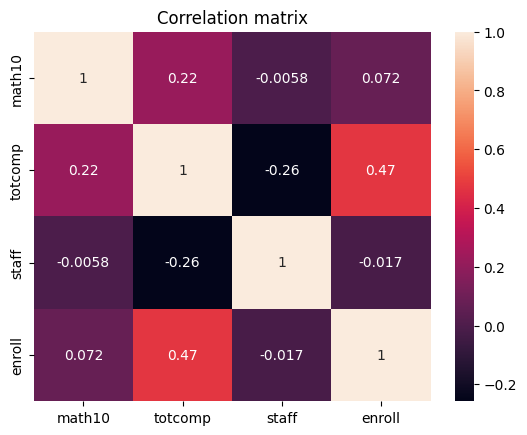

In [10]:
corr_mtrx = data.corr()
sns.heatmap(corr_mtrx, annot = True)
plt.title("Correlation matrix")

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

In [11]:
data.columns

Index(['math10', 'totcomp', 'staff', 'enroll'], dtype='object')

In [12]:
data = sm.add_constant(data)

In [13]:
data.columns

Index(['const', 'math10', 'totcomp', 'staff', 'enroll'], dtype='object')

In [14]:
model = sm.OLS(endog=data['math10']
               , exog=data[['const', 'totcomp', 'staff', 'enroll']]
              )
type(model)

statsmodels.regression.linear_model.OLS

<a id="reg-res"></a>

In [15]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 math10   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     7.697
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           5.18e-05
Time:                        06:28:09   Log-Likelihood:                -1526.2
No. Observations:                 408   AIC:                             3060.
Df Residuals:                     404   BIC:                             3076.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2740      6.114      0.372      0.710      -9.745      14.293
totcomp        0.0005      0.000      4.570      0.000       0.000       0.001
staff          0.0479      0.040      1.204      0.229      -0.030       0.126
enroll        -0.0002      0.000     -0.918      0.359      -0.001       0.000
==============================================================================
Omnibus:                       31.666   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.628
Skew:                           0.615   Prob(JB):                     1.51e-09
Kurtosis:                       3.936   Cond. No.                     4.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

In [16]:
results.params

const      2.274021
totcomp    0.000459
staff      0.047920
enroll    -0.000198
dtype: float64

In [17]:
res = results.params
res
res[0]

2.274020932174543

In [18]:
type(res)

pandas.core.series.Series

In [19]:
res.values

array([ 2.27402093e+00,  4.58611856e-04,  4.79198735e-02, -1.97561308e-04])

In [20]:
res.index[1:]

Index(['totcomp', 'staff', 'enroll'], dtype='object')

<a id="coef"></a>

Text(0.5, 1.0, 'Coefficients of OLS Regression Equation')

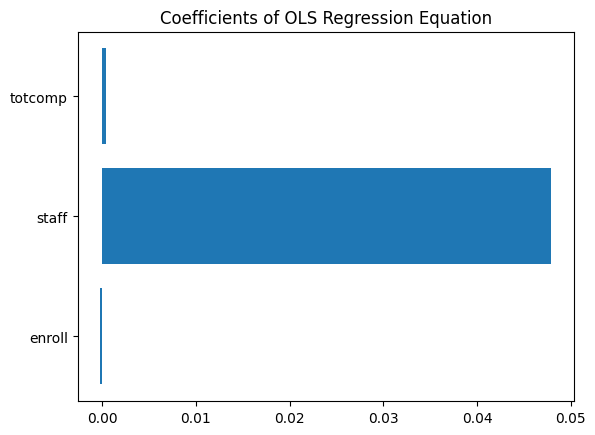

In [21]:
# Plot the coefficients, to visualise the impact of each variable on math10 for a quick comparison.
fig, ax = plt.subplots()

ax.barh(res.index[1:], res.values[1:])

ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title('Coefficients of OLS Regression Equation')

In [22]:
results.params

const      2.274021
totcomp    0.000459
staff      0.047920
enroll    -0.000198
dtype: float64

<a id="reg-eq"></a>
<h3>OLS regression line</h3>
<p style="text-align:center; font-size:1.5em; color:blue">$
\widehat{math10} = 2.274 + 0.00046 \hspace{0.1cm} totcomp + 0.048 \hspace{0.1cm} sta\hspace{-0.1em}f\hspace{-0.2em}f - 0.0002 \hspace{0.1cm} enroll
$</p>

<h3>Interpretation</h3>
<h5><u>The slope estimates</u></h5>
<p>There is a positive partial relationship between $math10$ and $totcomp$.<br /><strong>One thousand
</strong> dollars increase in teacher compensation results in performance increase by 0.46 percentage points 
 ($math10$ is measured as a percentage), holding $sta\hspace{-0.1em}f\hspace{-0.2em}f$ and $enroll$ fixed.</p>
<p>There is a positive partial relationship between $math10$ and $sta\hspace{-0.1em}f\hspace{-0.2em}f$.<br /><strong>Ten</strong> staff per 1000 students increase in staff size results in performance increase by 0.48 percentage points, holding $totcomp$ and $enroll$ fixed.</p>
<p>There is a negative partial relationship between $math10$ and $enroll$.<br /><strong>One thousand</strong> 
students increase in school size results in performance decrease by 0.2 percentage points, holding $totcomp$ and $sta\hspace{-0.1em}f\hspace{-0.2em}f$ fixed.</p>
<h5><u>The constant</u></h5>
<p>The intercept is the predicted performance increase by 2.274 percentage points if teaching quality, staff size and school size are all set as zero.</p>

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<a id="r2"></a>

In [23]:
from IPython.display import Markdown as md
r2 = round(results.rsquared, 4)
md('<p>{r2str} {eqstr} {r2vlustr}</p>'.format(r2str='$R^2$', eqstr='$=$', r2vlustr=f'${r2}$'))

<p>$R^2$ $=$ $0.0541$</p>

<h4>Interpretation</h4>
<p>The independent variables - teaching quality, staff size and school size - <strong><em>explain</em></strong> 
only about 5.41% of the variation in $math10$ for this sample.<br />That means that 94.59% of the $math10$ 
variations is left unexplained!</p>
<p>This lack of explanatory power may not be too surprising because many other factors should influence $math10$; 
these factors are necessarily included in the errors in the regression analysis.</p>

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<a id="ttest"></a>

<h3>The $t$ test</h3>

In [24]:
# t-scores
results.tvalues

const      0.371949
totcomp    4.570030
staff      1.203593
enroll    -0.917935
dtype: float64

<a id="t-stat"></a>

Text(0.5, 1.0, 'The t Statistics of OLS Regression Equation')

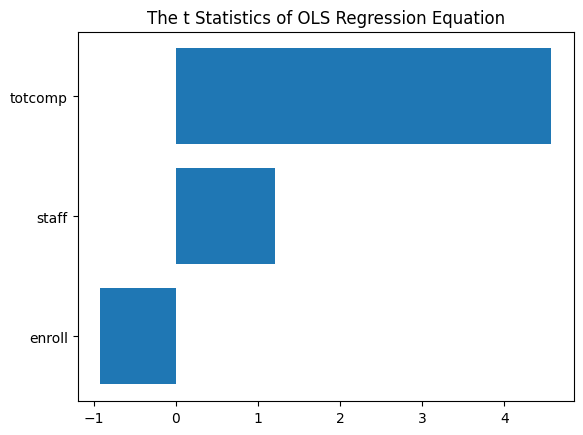

In [25]:
# Plot the t statistics for a visual comparison:
results.tvalues.index[1:]

fig, ax = plt.subplots()

ax.barh(results.tvalues.index[1:], results.tvalues.values[1:])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title('The t Statistics of OLS Regression Equation')

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

In [26]:
# degrees of freedom "residuals"
results.df_resid

404.0

In [27]:
k = results.df_model
k

3.0

<p>Degrees of freedom = 404 (greater than 120).<br />We use the standard normal critical value.</p>

<a id="c"></a>

In [28]:
# critical values

# significance levels and critical region (also known as the rejection region)
alpha1 = 0.01
alpha5 = 0.05
alpha10 = 0.1

# scipy.stats.norm.ppf(alpha)
c1 = st.norm.ppf(alpha1)
c5 = st.norm.ppf(alpha5)
c10 = st.norm.ppf(alpha10)
print('Left-tailed critical z-value at 1% significance level: ', c1)
print('Left-tailed critical z-value at 5% significance level: ', c5)
print('Left-tailed critical z-value at 10% significance level: ', c10)

Left-tailed critical z-value at 1% significance level:  -2.3263478740408408
Left-tailed critical z-value at 5% significance level:  -1.6448536269514729
Left-tailed critical z-value at 10% significance level:  -1.2815515655446004


In [29]:
results.tvalues.enroll

-0.9179348356508237

<a id="tres"></a>

<h3>Results</h3>
<p>We fail to reject $H_0$ in favor of $H_1$ at the 5% level.<br />We fail to reject $H_0$ even at the 10% level.<br />We conclude that $enroll$ is statistically <strong>insignificant</strong> at the 10% level.</p>

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<a id="pval"></a>

In [30]:
# one-sided p-value
results.pvalues.enroll / 2

0.17960032741306386

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<a id="ci"></a>

In [31]:
#confidence interval
results.conf_int(alpha=0.05)

,0,1
const,-9.744801,14.292842
totcomp,0.000261,0.000656
staff,-0.030349,0.126188
enroll,-0.000621,0.000226


In [32]:
type(results.conf_int())

pandas.core.frame.DataFrame

In [33]:
ci05 = results.conf_int(alpha=0.05)
ci05.loc[['enroll']]

,0,1
enroll,-0.000621,0.000226


<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<a id="log"></a>
<p>We also estimate the model with the dependent variable in its original form (called level form), while the independent variables in logarithmic form.</p>
<p>This allows, for example, the school size effect to <strong>diminish</strong> as school size increases.</p>

<h2>The linear-log model</h2>
<p style="text-align:center; font-size:1.5em; color:blue">
$
\widehat{math10} = \beta_0 + \beta_1 \log{(totcomp)} +\beta_2 \log{(sta\hspace{-0.1em}f\hspace{-0.2em}f)} + \beta_3
 \log{(enroll)}
$
</p>

<p><font size="4" face="Times New Roman"><em><strong>where</strong></em></font></p>

<div style="width:90%; display:table; padding-left:3%">
    <div style="width:70%; display:table-row-group">
        <div style="display:table-row">
            <div style="display:table-cell">$\beta_1$</div>
            <div style="display:table-cell; padding-left:2%">is the elasticity of $totcomp$ with respect to $math10$,</div>
        </div>
        <div style="display: table-row">
            <div style="display:table-cell">$\beta_2$</div>
            <div style="display:table-cell; padding-left:2%">is the elasticity of $sta\hspace{-0.1em}f\hspace{-0.2em}f$ with respect to $math10$, and</div>
        </div>
        <div style="display: table-row">
            <div style="display:table-cell">$\beta_3$</div>
            <div style="display:table-cell; padding-left:2%">is the elasticity of $enroll$ with respect to $math10$.</div>
        </div>
    </div>
</div>

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<p style="font-size:1.2em"><strong>From variable descriptions,</strong></p>
<p></p>

<div style="width:50%; display:table; padding-left:3%; font-size:1.1em">
    <div style="width:50%; display:table-row-group">
        <div style="display:table-row">
            <div style="display:table-cell">$ltotcomp$</div>
            <div style="display:table-cell">$= \log{(totcomp)}$,</div>
        </div>
        <div style="display:table-row">
            <div style="display:table-cell">$lsta\hspace{-0.1em}f\hspace{-0.2em}f$</div>
            <div style="display:table-cell">$= \log{(sta\hspace{-0.1em}f\hspace{-0.2em}f)}$, and</div>
        </div>
        <div style="display:table-row">
            <div style="display:table-cell">$lenroll$</div>
            <div style="display:table-cell">$= \log{(enroll)}$.</div>
        </div>
    </div>
</div>

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

In [34]:
df.columns

Index(['lnchprg', 'enroll', 'staff', 'expend', 'salary', 'benefits',
       'droprate', 'gradrate', 'math10', 'sci11', 'totcomp', 'ltotcomp',
       'lexpend', 'lenroll', 'lstaff', 'bensal', 'lsalary'],
      dtype='object')

<a id="ltarget"></a>

In [35]:
# target
ldata = df[['math10', 'ltotcomp', 'lstaff', 'lenroll']]
ldata.head()

,math10,ltotcomp,lstaff,lenroll
0,56.400002,10.712594,4.723842,7.529407
1,42.700001,10.986851,4.617099,9.337414
2,43.799999,10.856188,4.736198,8.947025
3,25.299999,10.533562,4.447346,7.045776
4,15.300000,10.472375,4.565389,7.360104


In [43]:
ldata = sm.add_constant(ldata)

In [44]:
ldata.columns

Index(['const', 'math10', 'ltotcomp', 'lstaff', 'lenroll'], dtype='object')

In [45]:
lmodel = sm.OLS(endog=ldata['math10']
               , exog=ldata[['const', 'ltotcomp', 'lstaff', 'lenroll']]
              )
type(lmodel)

statsmodels.regression.linear_model.OLS

<a id="lres"></a>

In [46]:
lresults = lmodel.fit()
lresults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 math10   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     9.420
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           4.97e-06
Time:                        06:37:18   Log-Likelihood:                -1523.7
No. Observations:                 408   AIC:                             3055.
Df Residuals:                     404   BIC:                             3072.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -207.6648     48.703     -4.264      0.000    -303.408    -111.922
ltotcomp      21.1550      4.056      5.216      0.000      13.182      29.128
lstaff         3.9800      4.190      0.950      0.343      -4.256      12.216
lenroll       -1.2680      0.693     -1.829      0.068      -2.631       0.095
==============================================================================
Omnibus:                       27.703   Durbin-Watson:                   1.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.495
Skew:                           0.568   Prob(JB):                     3.23e-08
Kurtosis:                       3.860   Cond. No.                     1.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
lres = lresults.params
lres

const      -207.664785
ltotcomp     21.154997
lstaff        3.980018
lenroll      -1.268046
dtype: float64

<a id="lcoef"></a>

Text(0.5, 1.0, 'Coefficients of the linear-log regression equation')

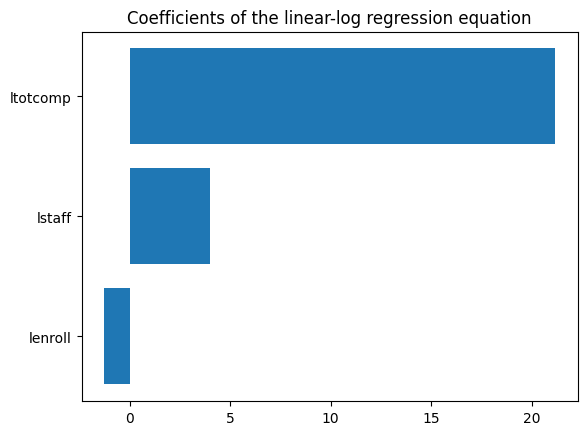

In [48]:
# Plot the coefficients, to visualise the impact of each variable on math10 for a quick comparison.

fig, ax = plt.subplots()

ax.barh(lres.index[1:], lres.values[1:])

ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title('Coefficients of the linear-log regression equation')

In [49]:
lres

const      -207.664785
ltotcomp     21.154997
lstaff        3.980018
lenroll      -1.268046
dtype: float64

In [50]:
round(round(lres.ltotcomp, 4), 2)

21.16

<a id="lreg-eq"></a>
<h3>Sample linear-log relationship</h3>
<p style="text-align:center; font-size:1.5em; color:blue">
    $
    \widehat{math10} = -207.66 + 21.16 \log{(totcomp)} + 3.98 \log{(sta\hspace{-0.1em}f\hspace{-0.2em}f)} - 1.27 \log{(enroll)}
    $
</p>

<h3>Interpretation</h3>
<p>The change in $\log{(enroll)}$, when multiplied by 100, is approximately the percentage change in $enroll$.<br />
<strong>1%</strong> increase in student enrollment results in performance decrease by 0.0127 percentage points, holding $totcomp$ and $sta\hspace{-0.1em}f\hspace{-0.2em}f$ fixed.<br />
<strong>10%</strong> increase in student enrollment results in performance decrease by 0.13 percentage points, holding $totcomp$ and $sta\hspace{-0.1em}f\hspace{-0.2em}f$ fixed.</p>

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

In [51]:
# r-squared
round(lresults.rsquared, 4)

0.0654

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<a id="ltres"></a>

In [52]:
# t-statistic on log(enroll)
round(lresults.tvalues.lenroll, 2)

-1.83

<p style="font-size:1.2em">$t_{\log{(enroll)}} = -1.83$</p>
<p style="font-size:1.2em">We reject $H_0: \beta_{\log{(enroll)}} = 0$ in favor of $H_1: \beta_{\log{(enroll)}} < 0$ at the 5% level.</p>
<p style="font-size:1.2em">We conclude that $\log{(enroll)}$ is statistically <strong>significant</strong> at the 5% level.</p>

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<a id="lpval"></a>

In [53]:
# one-sided p-value
lresults.pvalues.lenroll / 2

0.034049237313431104

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<a id="lci"></a>

In [54]:
#confidence interval
lresults.conf_int(alpha=0.05)

,0,1
const,-303.407983,-111.921587
ltotcomp,13.182382,29.127612
lstaff,-4.256239,12.216275
lenroll,-2.630784,0.094691


In [55]:
lci05 = lresults.conf_int(alpha=0.05)
lci05.loc[['lenroll']]

,0,1
lenroll,-2.630784,0.094691


<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<a id="end"></a>
<h3>Conclusion</h3>
<p style="font-size:1.2em">The higher $R^2$ for the linear-log model (6.5% to 5.4%) means we explain more of the variation in math10 by using enroll in logarithmic form.</p>
<p style="font-size:1.2em">The linear-log model is preferred because it more closely captures the relationship between math10 and enroll.</p>

<hr style="height:2px;border-width:0;color:gray;background-color:gray">